In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [31]:

df = pd.read_csv("city_day.csv")


In [32]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [33]:
df.shape

(29531, 16)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [35]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29526    False
29527    False
29528    False
29529    False
29530    False
Length: 29531, dtype: bool

In [36]:
df.isna().sum()/df.shape[0]*100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [37]:
# Drop columns with more than 60% missing values
df = df.drop(columns=[ 'Xylene'])


In [38]:

# Fill missing Datetime with forward fill 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


In [39]:

# Fill AQI with forward fill
df['AQI'] = df['AQI'].fillna(method='ffill')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6508\2444117264.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AQI'] = df['AQI'].fillna(method='ffill')


In [40]:

# Drop AQI_Bucket (we'll create our own category)
df = df.drop(columns=['AQI_Bucket'])


In [41]:

# For pollutant features: use median filling
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
for col in pollutants:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [42]:

# Drop remaining rows with essential nulls
df = df.dropna(subset=['AQI'])


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:

# Create AQI Category
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    else:
        return 'Bad'

df['AQI_Category'] = df['AQI'].apply(categorize_aqi)


 AQI Category Distribution

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6508\3362956678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AQI_Category', palette='viridis')


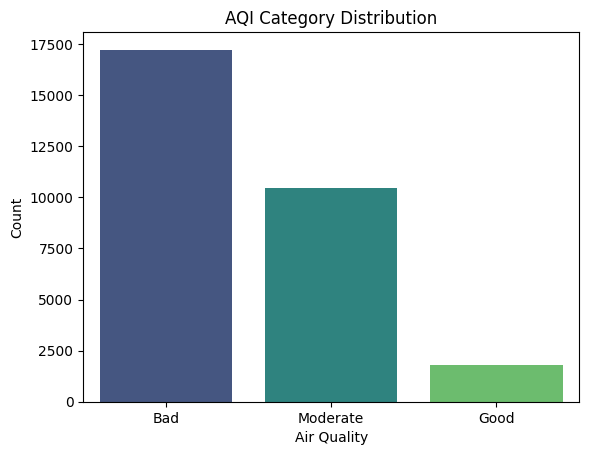

In [45]:
sns.countplot(data=df, x='AQI_Category', palette='viridis')
plt.title('AQI Category Distribution')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.show()


### The dataset is imbalanced, especially because one or more classes (like "Good") are underrepresented compared to others

 # Correlation Heatmap

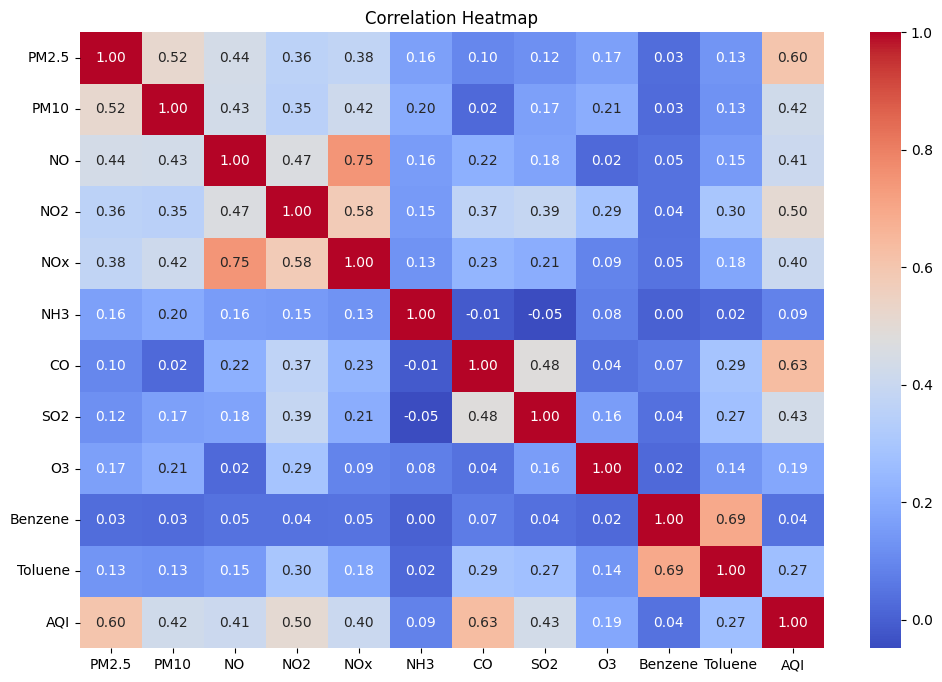

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


# Pairplot for Key Pollutants

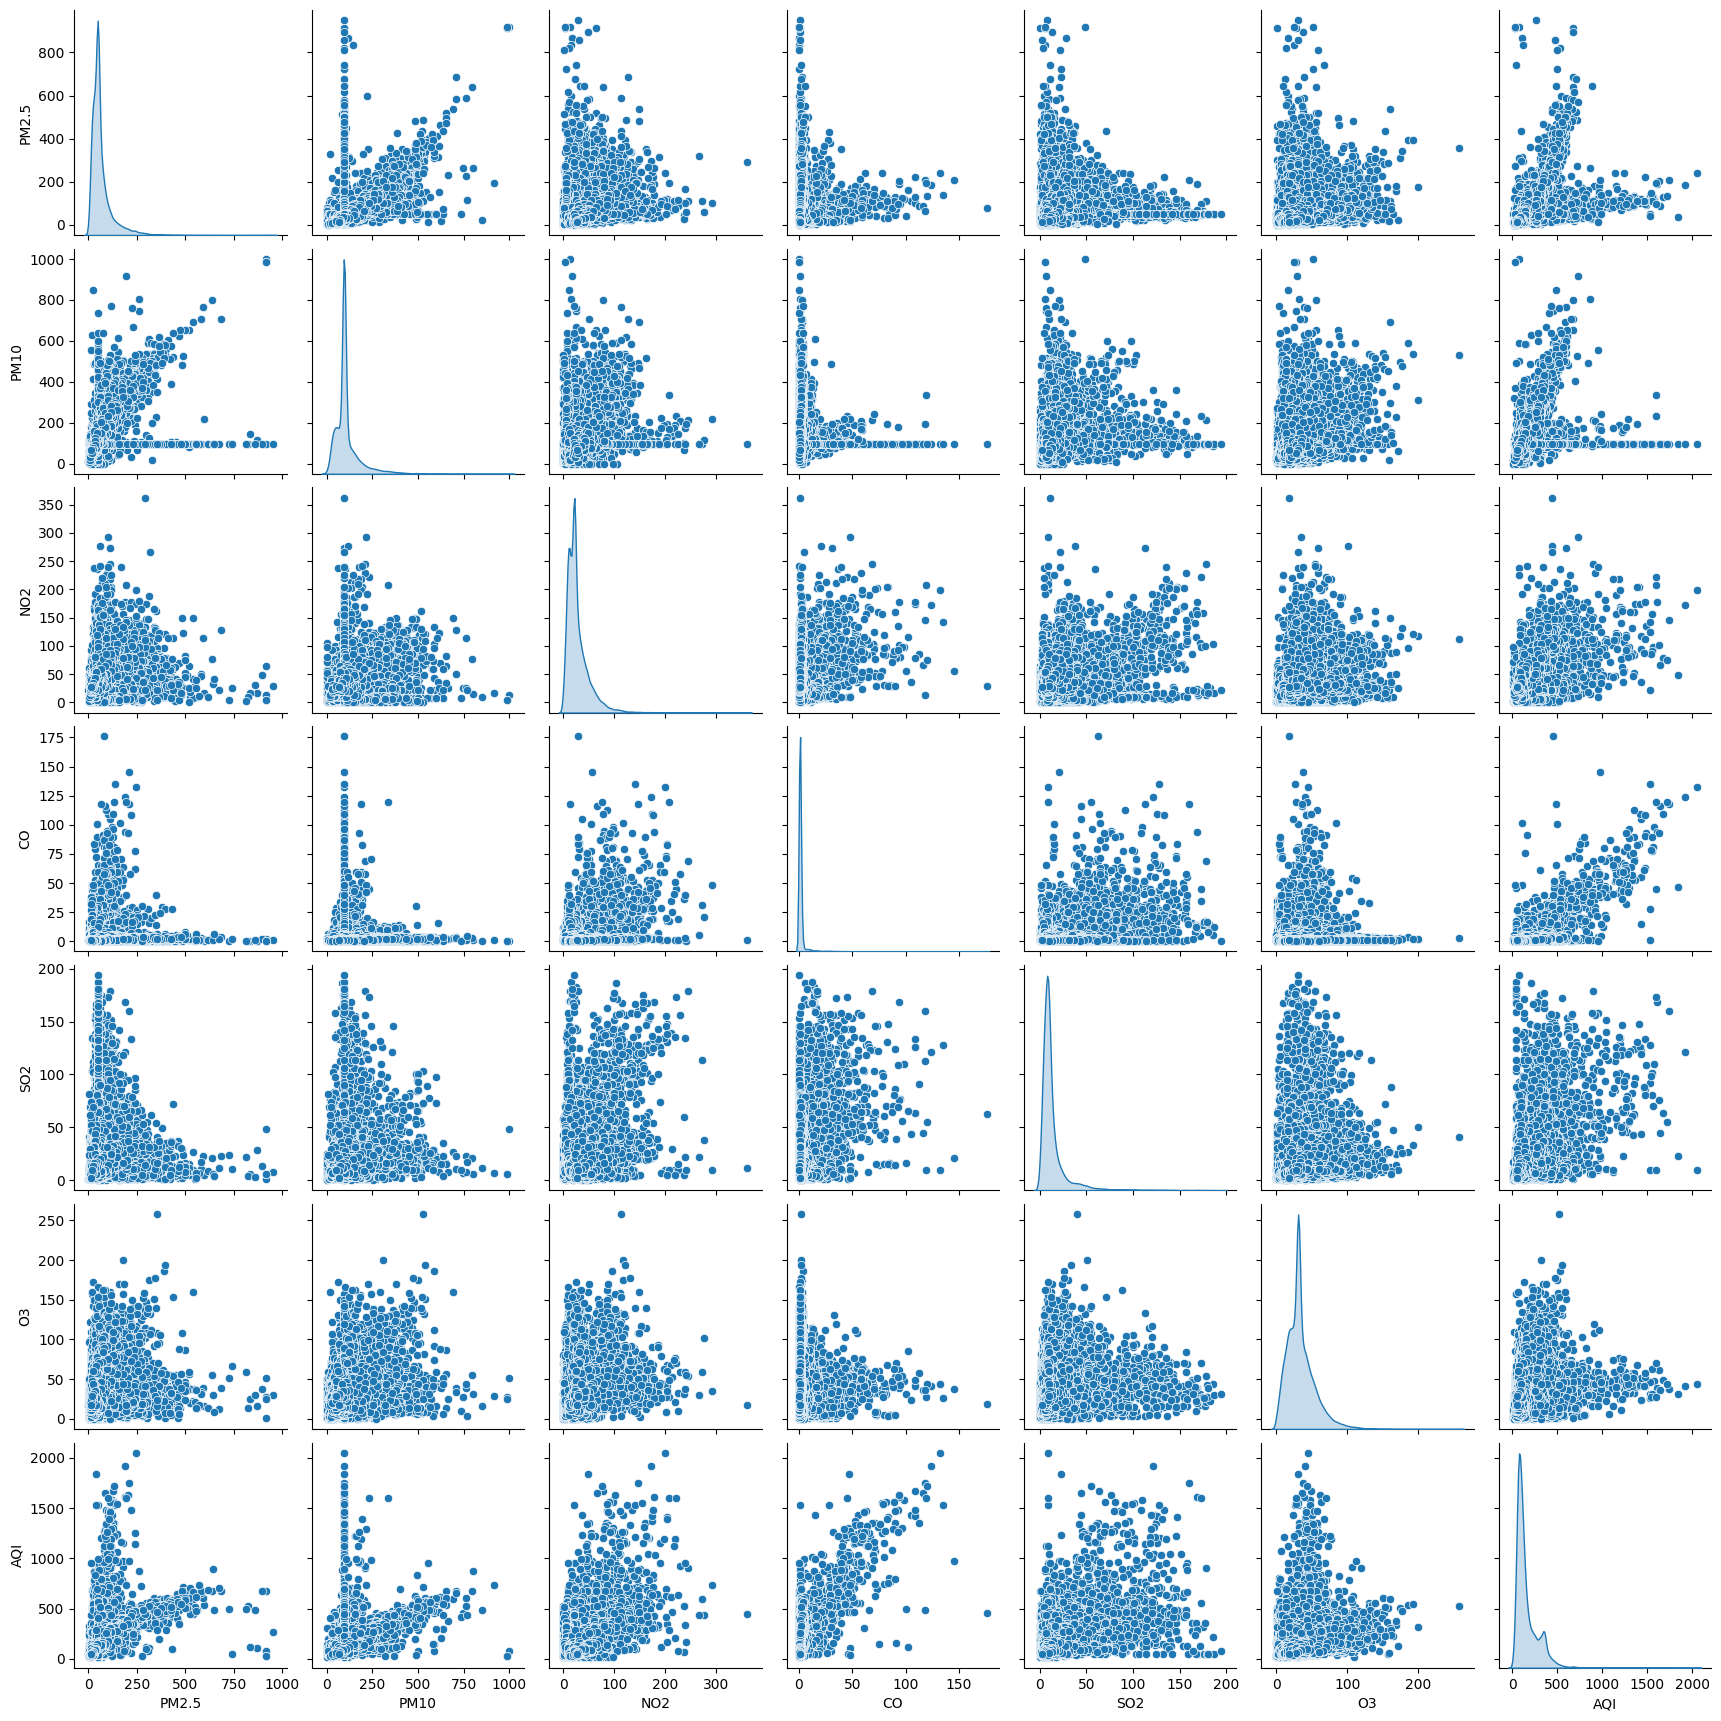

In [47]:
sample_df = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']]

sns.pairplot(sample_df, diag_kind='kde')
plt.show()


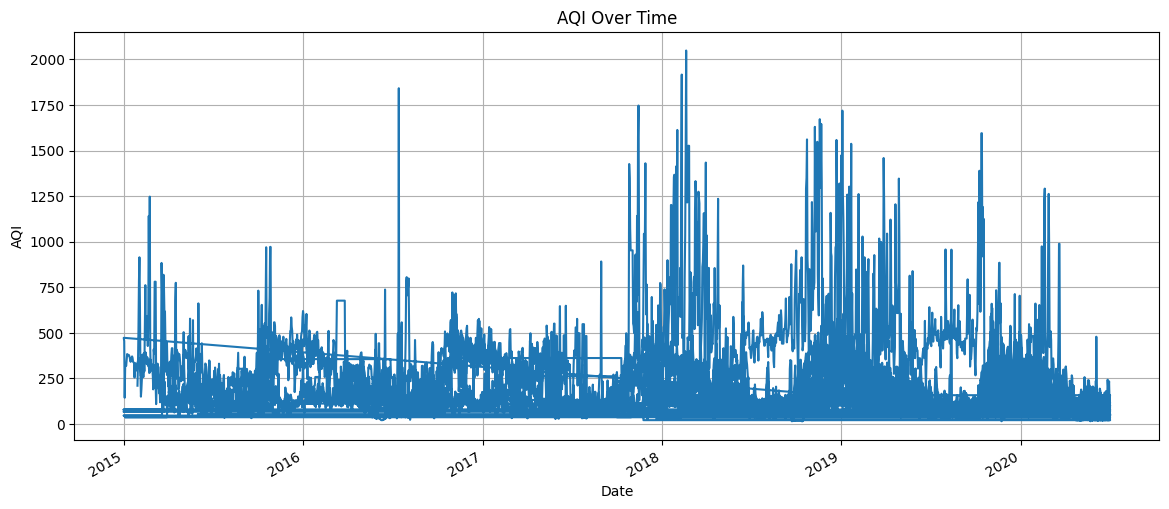

In [48]:
plt.figure(figsize=(14,6))
df.set_index('Date')['AQI'].plot()
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


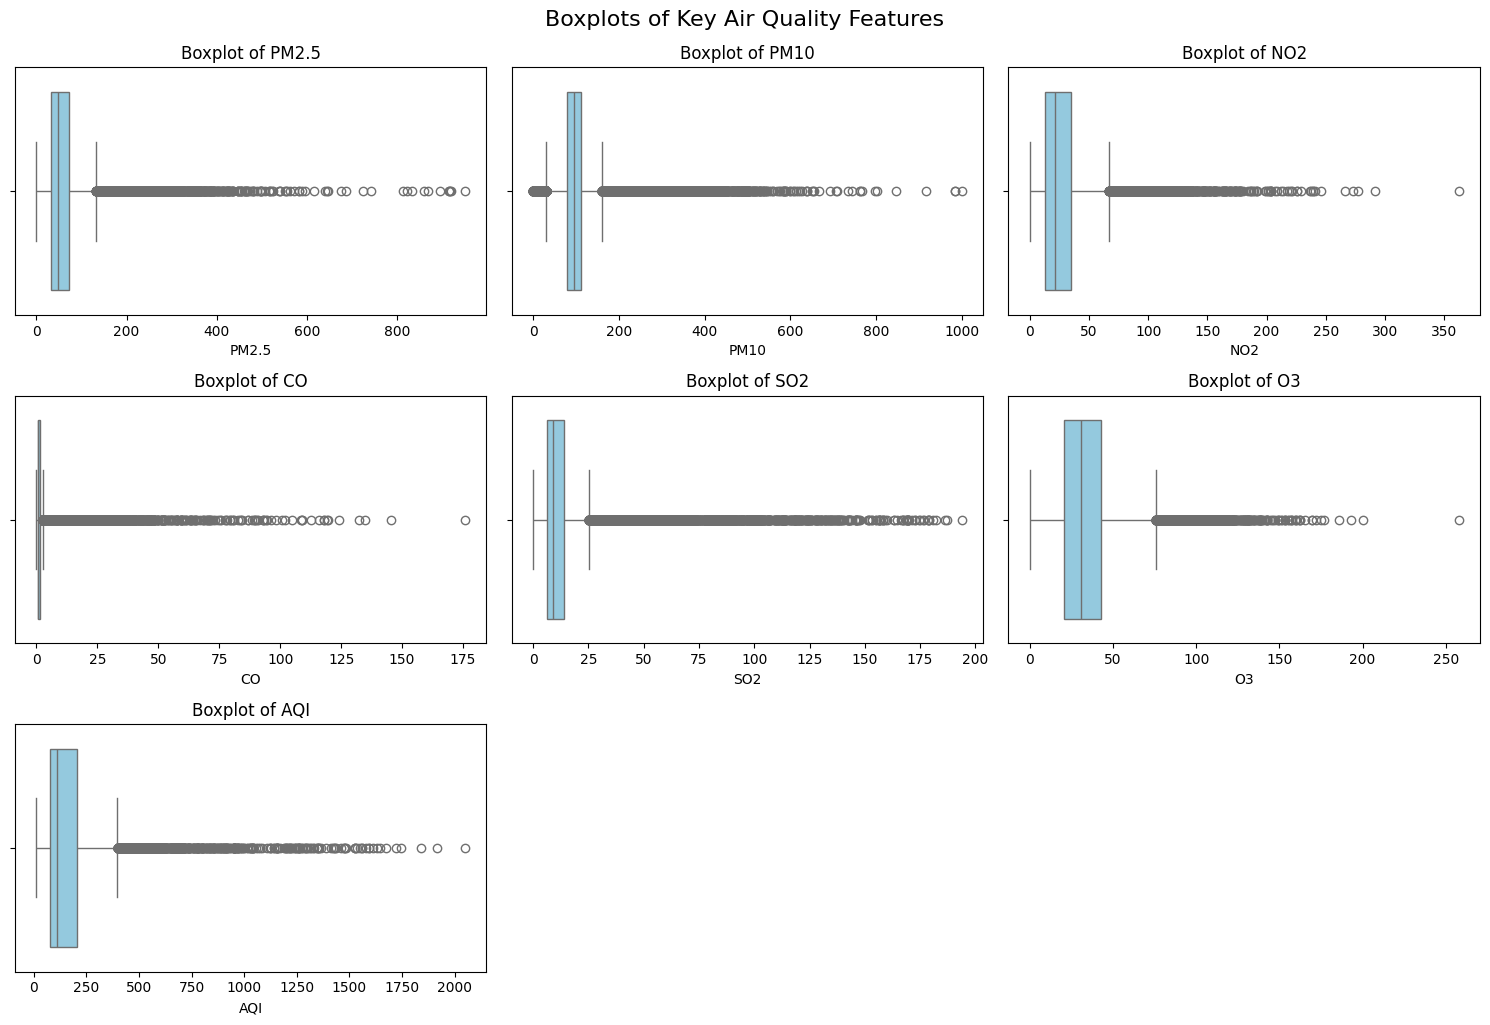

In [49]:

# key features for outlier detection
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']


plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Boxplots of Key Air Quality Features", fontsize=16, y=1.02)
plt.show()

In [50]:
X = df.drop(['AQI', 'AQI_Category','Date','City'], axis=1)
y = df['AQI']


In [51]:

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [52]:
for col in x_train.select_dtypes(include=[np.number]).columns:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x_train[col] = np.clip(x_train[col], lower, upper)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [55]:
y_pred = model.predict(x_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("✅ RMSE:", rmse)
print("✅ R² Score:", r2)

✅ RMSE: 63.6148312098404
✅ R² Score: 0.801208939710842


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [57]:
param_dist = {
    'n_estimators': randint(100, 300),        # Number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Depth of trees
    'min_samples_split': randint(2, 10),      # Min samples to split
    'min_samples_leaf': randint(1, 5),        # Min samples at leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Features to consider at split
}


In [58]:
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=3, verbose=2, random_state=42,
                                   n_jobs=-1, scoring='r2')


In [59]:
random_search.fit(x_train, y_train)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(x_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
66 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

In [60]:
print("Best Parameters:", random_search.best_params_)
print("Tuned RMSE:", rmse)
print("Tuned R² Score:", r2)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 149}
Tuned RMSE: 62.55802479456385
Tuned R² Score: 0.8077589422205276


In [61]:
x2 = df.drop(['AQI', 'AQI_Category','Date','City','NH3', 'O3', 'Benzene'], axis=1)
y2 = df['AQI']

In [62]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x2, y2, test_size=0.2, random_state=42)

In [63]:
for col in x_train2.select_dtypes(include=[np.number]).columns:
    Q1 = x_train2[col].quantile(0.25)
    Q3 = x_train2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x_train2[col] = np.clip(x_train2[col], lower, upper)

In [64]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train2, y_train2)


RandomForestRegressor(random_state=42)

In [65]:
y_pred2 = model.predict(x_test2)

# Evaluate
rmse = mean_squared_error(y_test2, y_pred2, squared=False)
r2 = r2_score(y_test2, y_pred2)

print("✅ RMSE:", rmse)
print("✅ R² Score:", r2)

✅ RMSE: 65.32299390367926
✅ R² Score: 0.7903898763360038


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [66]:
from xgboost import XGBRegressor

In [ ]:


# XGBoost Regressor
xgb = XGBRegressor(random_state=42)


In [ ]:

#  Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}


In [69]:

#  Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [70]:

#  Fit the model
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [71]:

# ✅ Best model
best_model = random_search.best_estimator_


In [72]:

# 🔎 Predict
y_pred = best_model.predict(x_test)


In [73]:

# 📊 Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [74]:

print("Best Parameters:", random_search.best_params_)
print(f"Tuned RMSE: {rmse}")
print(f"Tuned R² Score: {r2}")


Best Parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Tuned RMSE: 62.957738342591334
Tuned R² Score: 0.8052944512500978


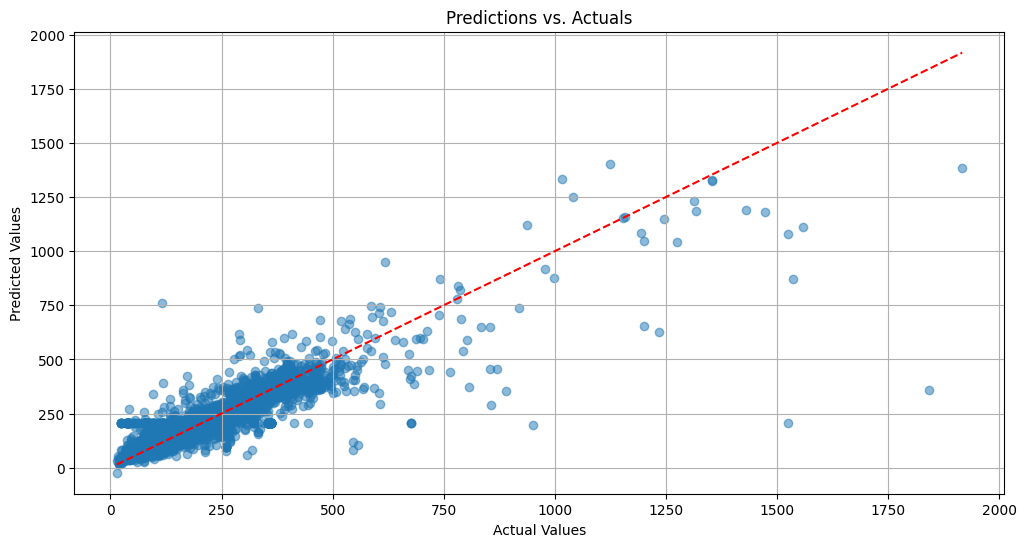

In [75]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title("Predictions vs. Actuals")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Category'],
      dtype='object')

### Treating imbalanced Data using SMOTHE (Synthetic Minority Oversampling Technique)

In [81]:
from imblearn.over_sampling import SMOTE


In [79]:
X = df.drop(['City', 'Date', 'Benzene', 'Toluene', 'AQI', 'AQI_Category'], axis=1)
y = df['AQI_Category']


In [82]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [84]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [85]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Confusion Matrix:
 [[2929  213  288]
 [  27 3325   71]
 [ 202  219 3057]]

Classification Report:
               precision    recall  f1-score   support

         Bad       0.93      0.85      0.89      3430
        Good       0.89      0.97      0.93      3423
    Moderate       0.89      0.88      0.89      3478

    accuracy                           0.90     10331
   macro avg       0.90      0.90      0.90     10331
weighted avg       0.90      0.90      0.90     10331

